# Solar spectrum

`sbpy` includes a framework for requesting solar flux densities, which is used throughout the module, e.g., for coma Afρ to flux density conversions, and for computing asteroid absolute magnitudes.  Users may select from a set of source solar spectra, and can request near-arbitrary wavelengths.  The spectra are rebinned to the requested wavelengths with the `synphot` package.

# Kurucz 1993

Plot the Kurucz (1993) solar spectrum as scaled by Colina et al. (1996) and a rebinned version at a spectral resolution of 25.

/home/msk/local/lib/python3.6/site-packages/synphot/models.py:342: RuntimeWarning: invalid value encountered in less
  i = np.where(y < 0)


<IPython.core.display.Javascript object>


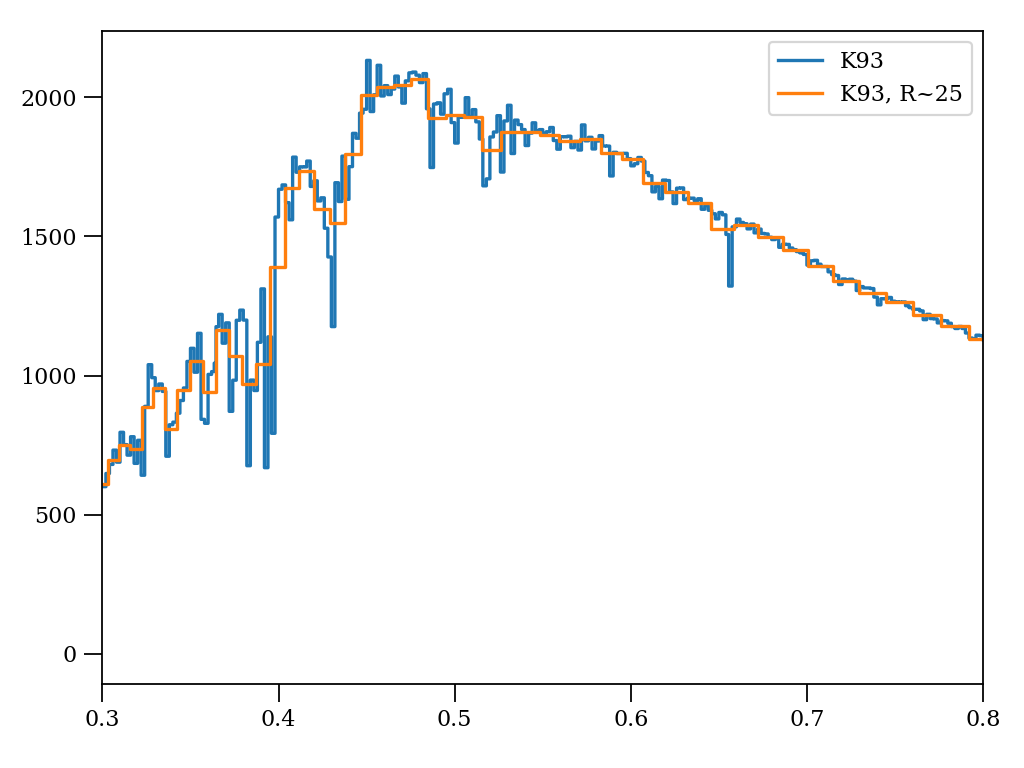

/home/msk/local/lib/python3.6/site-packages/synphot/models.py:342: RuntimeWarning: invalid value encountered in less
  i = np.where(y < 0)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from sbpy.data.sun import solar_fluxd

% matplotlib notebook

plt.figure(1)
plt.clf()
waveK, fluxdK = solar_fluxd(None, source='K93')
plt.plot(waveK.to('um'), fluxdK, ls='steps-mid', label='K93')

R = 25  # goal spectral resolution
wrange = 0.3, 0.8  # wavelength range
n = R * np.diff(np.log10(wrange)) * 4.61
wave_binned = np.logspace(np.log10(wrange[0]), np.log10(wrange[1]), n)  * u.um
fluxdK_binned = solar_fluxd(wave_binned, source='K93')
plt.plot(wave_binned, fluxdK_binned, ls='steps-mid', label='K93, R~{}'.format(R))

plt.xlim(0.3, 0.8)
plt.legend()

# Colina et al. (1996)

Repeat the plot for the Colina et al. (1996) spectrum from Castelli.

<IPython.core.display.Javascript object>


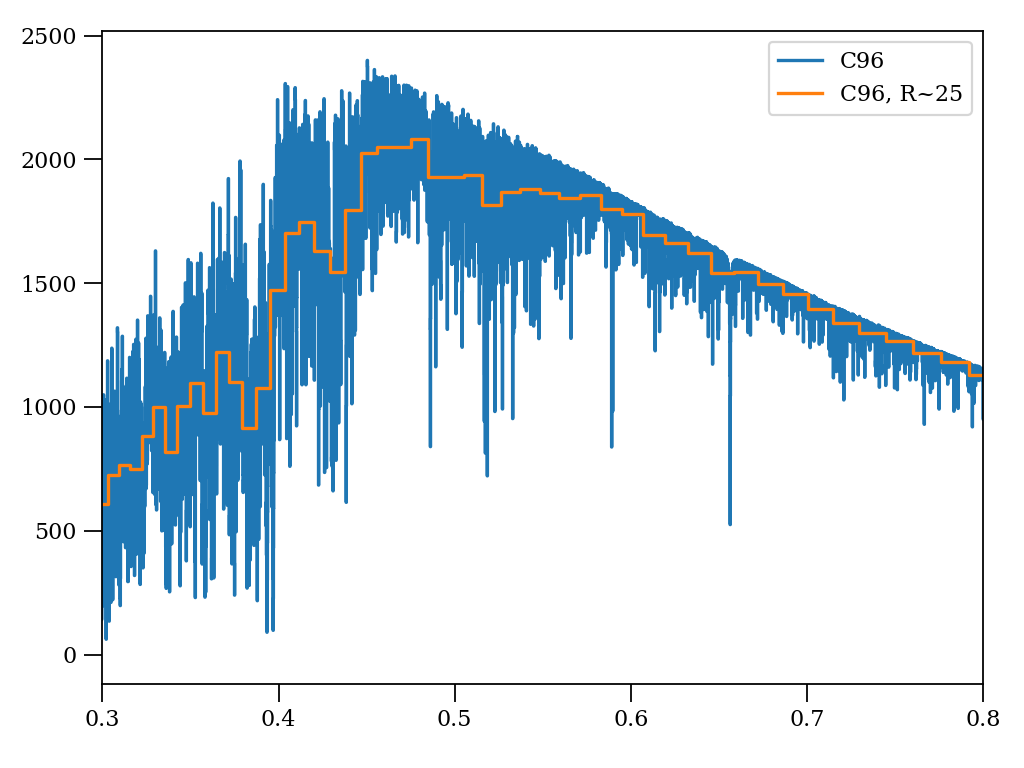

In [2]:
plt.figure(2)
plt.clf()
waveC, fluxdC = solar_fluxd(None, source='C96')
plt.plot(waveC.to('um'), fluxdC, ls='steps-mid', label='C96')

fluxdC_binned = solar_fluxd(wave_binned, source='C96')
plt.plot(wave_binned, fluxdC_binned, ls='steps-mid', label='C96, R~{}'.format(R))

plt.xlim(0.3, 0.8)
plt.legend()

# K93 vs. C96

Compare the two rebinned spectra.

<IPython.core.display.Javascript object>


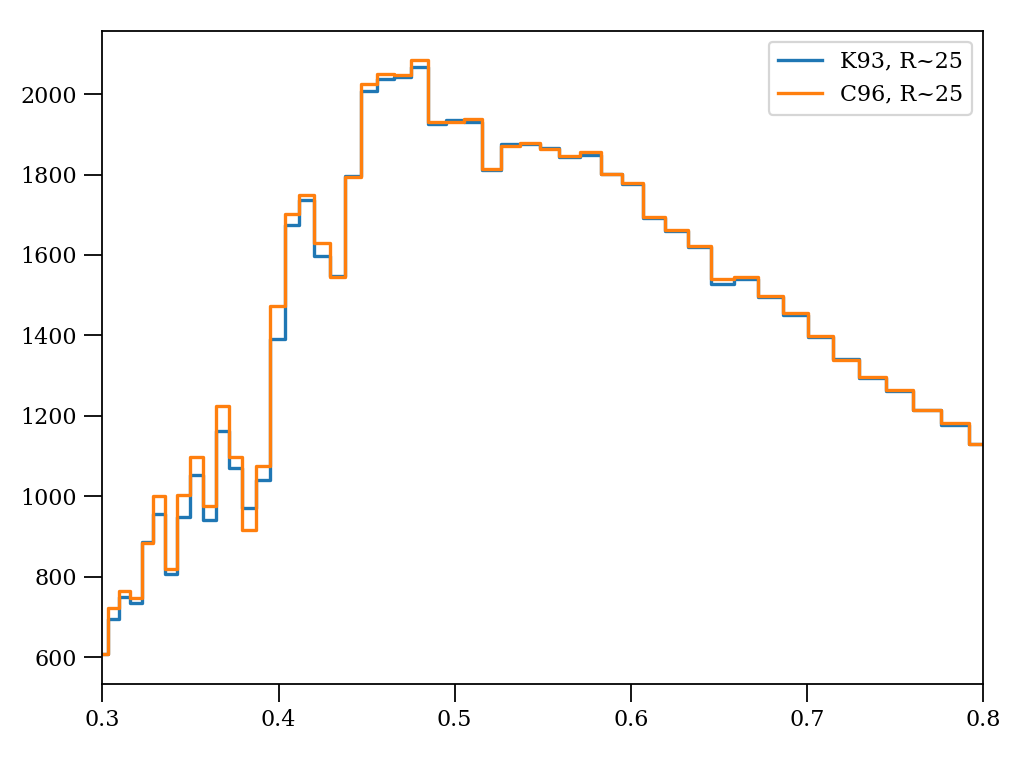

In [3]:
plt.figure(3)
plt.clf()
plt.plot(wave_binned, fluxdK_binned, ls='steps-mid', label='K93, R~{}'.format(R))
plt.plot(wave_binned, fluxdC_binned, ls='steps-mid', label='C96, R~{}'.format(R))
plt.xlim(0.3, 0.8)
plt.legend()